In [319]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [320]:
df = pd.read_csv("program_details.csv")
df.head()

,Electoral District Number/Numéro de circonscription,Electoral District Name/Nom de circonscription,Polling Station Number/Numéro du bureau de scrutin NEW,Total Votes/ Total des votes 2021,Electors/ Électeurs 2021,Total Votes/ Total des votes 2019,Electors/ Électeurs 2019,vote_difference,Change in electors,Treatment,Vote Pledges,Vote Plans,Vote Triples,Tracked Relational
0,35003,Aurora--Oak Ridges--Richmond Hill/Aurora--Oak ...,12,370,537,224,551,146,-14,1,87.0,47.0,34.0,35.0
1,35003,Aurora--Oak Ridges--Richmond Hill/Aurora--Oak ...,609,899,0,842,0,57,0,0,NaN,NaN,NaN,NaN
2,35003,Aurora--Oak Ridges--Richmond Hill/Aurora--Oak ...,27/400/502/505,144,380,91,175,53,205,1,53.0,26.0,31.0,12.0
3,35003,Aurora--Oak Ridges--Richmond Hill/Aurora--Oak ...,615,1167,0,1128,0,39,0,0,NaN,NaN,NaN,NaN
4,35003,Aurora--Oak Ridges--Richmond Hill/Aurora--Oak ...,1,236,694,212,471,24,223,1,91.0,41.0,44.0,28.0


In [321]:
df.rename(columns = {'Electoral District Number/Numéro de circonscription':'district_code', 'Electoral District Name/Nom de circonscription':'district_name','Total Votes/ Total des votes 2021':'votes2021','Total Votes/ Total des votes 2019':'votes2019'}, inplace = True)
df.head()

,district_code,district_name,Polling Station Number/Numéro du bureau de scrutin NEW,votes2021,Electors/ Électeurs 2021,votes2019,Electors/ Électeurs 2019,vote_difference,Change in electors,Treatment,Vote Pledges,Vote Plans,Vote Triples,Tracked Relational
0,35003,Aurora--Oak Ridges--Richmond Hill/Aurora--Oak ...,12,370,537,224,551,146,-14,1,87.0,47.0,34.0,35.0
1,35003,Aurora--Oak Ridges--Richmond Hill/Aurora--Oak ...,609,899,0,842,0,57,0,0,NaN,NaN,NaN,NaN
2,35003,Aurora--Oak Ridges--Richmond Hill/Aurora--Oak ...,27/400/502/505,144,380,91,175,53,205,1,53.0,26.0,31.0,12.0
3,35003,Aurora--Oak Ridges--Richmond Hill/Aurora--Oak ...,615,1167,0,1128,0,39,0,0,NaN,NaN,NaN,NaN
4,35003,Aurora--Oak Ridges--Richmond Hill/Aurora--Oak ...,1,236,694,212,471,24,223,1,91.0,41.0,44.0,28.0


In [322]:
df1 = df[["district_code","district_name","votes2021","votes2019","vote_difference","Treatment"]]
df1.head()

,district_code,district_name,votes2021,votes2019,vote_difference,Treatment
0,35003,Aurora--Oak Ridges--Richmond Hill/Aurora--Oak ...,370,224,146,1
1,35003,Aurora--Oak Ridges--Richmond Hill/Aurora--Oak ...,899,842,57,0
2,35003,Aurora--Oak Ridges--Richmond Hill/Aurora--Oak ...,144,91,53,1
3,35003,Aurora--Oak Ridges--Richmond Hill/Aurora--Oak ...,1167,1128,39,0
4,35003,Aurora--Oak Ridges--Richmond Hill/Aurora--Oak ...,236,212,24,1


In [323]:
df_t = df1[df["Treatment"]==1]

In [324]:
df_t.head()

,district_code,district_name,votes2021,votes2019,vote_difference,Treatment
0,35003,Aurora--Oak Ridges--Richmond Hill/Aurora--Oak ...,370,224,146,1
2,35003,Aurora--Oak Ridges--Richmond Hill/Aurora--Oak ...,144,91,53,1
4,35003,Aurora--Oak Ridges--Richmond Hill/Aurora--Oak ...,236,212,24,1
5,35003,Aurora--Oak Ridges--Richmond Hill/Aurora--Oak ...,149,183,-34,1
8,35016,Cambridge/Cambridge,1403,938,465,1


In [325]:
df_c = df1[df["Treatment"]==0]
df_c.head()

,district_code,district_name,votes2021,votes2019,vote_difference,Treatment
1,35003,Aurora--Oak Ridges--Richmond Hill/Aurora--Oak ...,899,842,57,0
3,35003,Aurora--Oak Ridges--Richmond Hill/Aurora--Oak ...,1167,1128,39,0
6,35003,Aurora--Oak Ridges--Richmond Hill/Aurora--Oak ...,204,273,-69,0
7,35016,Cambridge/Cambridge,1121,646,475,0
11,35016,Cambridge/Cambridge,704,492,212,0


In [326]:
df1.groupby("Treatment")["vote_difference"].head();

In [327]:
df1.describe()


,district_code,votes2021,votes2019,vote_difference,Treatment
count,77.000000,77.000000,77.000000,77.000000,77.000000
mean,35057.259740,805.116883,592.961039,212.155844,0.493506
std,28.837294,486.390870,328.284233,201.001510,0.503236
min,35003.000000,15.000000,0.000000,-98.000000,0.000000
25%,35043.000000,228.000000,273.000000,24.000000,0.000000
50%,35066.000000,951.000000,646.000000,236.000000,0.000000
75%,35084.000000,1190.000000,848.000000,364.000000,1.000000
max,35111.000000,1930.000000,1447.000000,657.000000,1.000000


In [328]:
df1.head()

,district_code,district_name,votes2021,votes2019,vote_difference,Treatment
0,35003,Aurora--Oak Ridges--Richmond Hill/Aurora--Oak ...,370,224,146,1
1,35003,Aurora--Oak Ridges--Richmond Hill/Aurora--Oak ...,899,842,57,0
2,35003,Aurora--Oak Ridges--Richmond Hill/Aurora--Oak ...,144,91,53,1
3,35003,Aurora--Oak Ridges--Richmond Hill/Aurora--Oak ...,1167,1128,39,0
4,35003,Aurora--Oak Ridges--Richmond Hill/Aurora--Oak ...,236,212,24,1


In [329]:
df1.head()

,district_code,district_name,votes2021,votes2019,vote_difference,Treatment
0,35003,Aurora--Oak Ridges--Richmond Hill/Aurora--Oak ...,370,224,146,1
1,35003,Aurora--Oak Ridges--Richmond Hill/Aurora--Oak ...,899,842,57,0
2,35003,Aurora--Oak Ridges--Richmond Hill/Aurora--Oak ...,144,91,53,1
3,35003,Aurora--Oak Ridges--Richmond Hill/Aurora--Oak ...,1167,1128,39,0
4,35003,Aurora--Oak Ridges--Richmond Hill/Aurora--Oak ...,236,212,24,1


In [330]:
df1.set_index(["Treatment"]).unstack("Treatment")

                 Treatment
district_code    1            35003
                 0            35003
                 1            35003
                 0            35003
                 1            35003
                              ...  
vote_difference  0              -98
                 1              525
                 0              362
                 1              255
                 0              150
Length: 385, dtype: object

In [331]:
c2019 = sum(df_c["votes2019"])
c2021 = sum(df_c["votes2021"])
t2019 = sum(df_t["votes2019"])
t2021 = sum(df_t["votes2021"])

In [332]:
plotdata = {'Years':['2019','2021'],
        'c_Votes':[c2019,c2021],
           't_votes':[t2019,t2021]}

In [333]:
plotdf = pd.DataFrame(plotdata)
plotdf.head()

,Years,c_Votes,t_votes
0,2019,24130,21528
1,2021,30831,31163


In [334]:
plotdf = plotdf.assign(dd_votes=[21528,28229])

# Difference in Difference Analysis

![Drag Racing](formula_dd.png)

In [335]:
DD = (t2021-c2021)-(t2019-c2019)

In [336]:
DD

2934

In [337]:
X=df1["vote_difference"]
Y= df1["Treatment"]

In [338]:
X = sm.add_constant(X)
model = sm.OLS(Y,X)

C:\Users\X1 Carbon\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


In [339]:
res = model.fit()
res.params

const              0.384816
vote_difference    0.000512
dtype: float64

In [340]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              Treatment   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     3.278
Date:                Mon, 13 Jun 2022   Prob (F-statistic):             0.0742
Time:                        07:57:49   Log-Likelihood:                -54.233
No. Observations:                  77   AIC:                             112.5
Df Residuals:                      75   BIC:                             117.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3848      0.082     

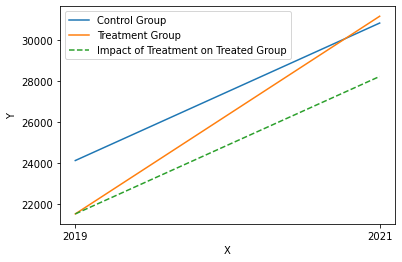

In [341]:
plt.plot(plotdf["Years"], plotdf["c_Votes"],label = "Control Group")
plt.plot(plotdf["Years"], plotdf["t_votes"], label="Treatment Group")
plt.plot(plotdf["Years"], plotdf["dd_votes"],linestyle='dashed', label="Impact of Treatment on Treated Group")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

# District Level Analysis

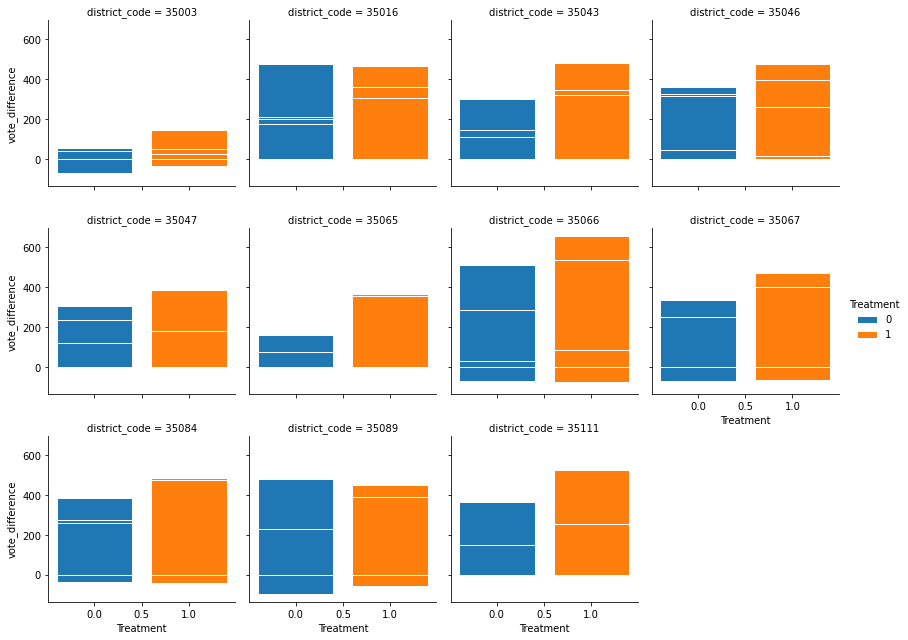

In [342]:
############# Main Section         #############
# Form a facetgrid using columns with a hue
graph = sns.FacetGrid(df1, col ="district_code",  hue ="Treatment",col_wrap=4)
# map the above form facetgrid with some attributes
graph.map(plt.bar, "Treatment", "vote_difference", edgecolor ="w").add_legend()
# show the object
plt.show()

In [343]:
df2 = df1.groupby(["district_name","district_code"]).sum()

In [344]:
df2.reset_index(inplace=True)


In [345]:
df2

,district_name,district_code,votes2021,votes2019,vote_difference,Treatment
0,Aurora--Oak Ridges--Richmond Hill/Aurora--Oak ...,35003,3169,2953,216,4
1,Cambridge/Cambridge,35016,7477,5280,2197,3
2,King--Vaughan/King--Vaughan,35043,5585,3873,1712,3
3,Kitchener South--Hespeler/Kitchener-Sud--Hespeler,35047,6227,4613,1614,3
4,Kitchener--Conestoga/Kitchener--Conestoga,35046,6268,4065,2203,4
5,Newmarket--Aurora/Newmarket--Aurora,35065,4276,3321,955,2
6,Niagara Centre/Niagara-Centre,35066,6676,4773,1903,5
7,Niagara Falls/Niagara Falls,35067,4711,3469,1242,4
8,Peterborough--Kawartha/Peterborough--Kawartha,35084,7174,5421,1753,4
9,St. Catharines/St. Catharines,35089,5971,4722,1249,4


In [346]:
df2.drop(["vote_difference","Treatment"],axis=1)

,district_name,district_code,votes2021,votes2019
0,Aurora--Oak Ridges--Richmond Hill/Aurora--Oak ...,35003,3169,2953
1,Cambridge/Cambridge,35016,7477,5280
2,King--Vaughan/King--Vaughan,35043,5585,3873
3,Kitchener South--Hespeler/Kitchener-Sud--Hespeler,35047,6227,4613
4,Kitchener--Conestoga/Kitchener--Conestoga,35046,6268,4065
5,Newmarket--Aurora/Newmarket--Aurora,35065,4276,3321
6,Niagara Centre/Niagara-Centre,35066,6676,4773
7,Niagara Falls/Niagara Falls,35067,4711,3469
8,Peterborough--Kawartha/Peterborough--Kawartha,35084,7174,5421
9,St. Catharines/St. Catharines,35089,5971,4722


In [347]:
df3 = df_c

In [348]:
df3 = df3.groupby("district_code").sum()

In [349]:
df3

,votes2021,votes2019,vote_difference,Treatment
district_code,,,,
35003,2270,2243,27,0
35016,4030,2965,1065,0
35043,2523,1962,561,0
35046,2992,1940,1052,0
35047,3427,2763,664,0
35065,1845,1611,234,0
35066,3162,2434,728,0
35067,2225,1751,474,0
35084,3431,2573,858,0


In [350]:
df3.reset_index(inplace =True)

In [351]:
df3.drop(["vote_difference","Treatment"],axis=1)
df3 = df3.rename(columns={"votes2021":"votes2021_c","votes2019":"votes2019_c"})
df3.head(11)

,district_code,votes2021_c,votes2019_c,vote_difference,Treatment
0,35003,2270,2243,27,0
1,35016,4030,2965,1065,0
2,35043,2523,1962,561,0
3,35046,2992,1940,1052,0
4,35047,3427,2763,664,0
5,35065,1845,1611,234,0
6,35066,3162,2434,728,0
7,35067,2225,1751,474,0
8,35084,3431,2573,858,0
9,35089,3189,2663,526,0


In [352]:
df4 = df_t
df4 = df4.groupby("district_code").sum()
df4.reset_index(inplace=True)

In [353]:
df4["Treatment"] = 1

In [354]:
df4 = df4.rename(columns={"votes2021":"votes2021_t","votes2019":"votes2019_t"})
df4.head(11)

,district_code,votes2021_t,votes2019_t,vote_difference,Treatment
0,35003,899,710,189,1
1,35016,3447,2315,1132,1
2,35043,3062,1911,1151,1
3,35046,3276,2125,1151,1
4,35047,2800,1850,950,1
5,35065,2431,1710,721,1
6,35066,3514,2339,1175,1
7,35067,2486,1718,768,1
8,35084,3743,2848,895,1
9,35089,2782,2059,723,1


In [355]:
df3["votes2021_t"] = df4["votes2021_t"]
df3["votes2019_t"] = df4["votes2019_t"]

In [356]:
df3 = df3.drop(["vote_difference","Treatment"], axis=1)
df3

,district_code,votes2021_c,votes2019_c,votes2021_t,votes2019_t
0,35003,2270,2243,899,710
1,35016,4030,2965,3447,2315
2,35043,2523,1962,3062,1911
3,35046,2992,1940,3276,2125
4,35047,3427,2763,2800,1850
5,35065,1845,1611,2431,1710
6,35066,3162,2434,3514,2339
7,35067,2225,1751,2486,1718
8,35084,3431,2573,3743,2848
9,35089,3189,2663,2782,2059


In [357]:
df3["treated_dd"] = (df3["votes2021_t"]-df3["votes2021_c"])-(df3["votes2019_t"]-df3["votes2019_c"])
df3

,district_code,votes2021_c,votes2019_c,votes2021_t,votes2019_t,treated_dd
0,35003,2270,2243,899,710,162
1,35016,4030,2965,3447,2315,67
2,35043,2523,1962,3062,1911,590
3,35046,2992,1940,3276,2125,99
4,35047,3427,2763,2800,1850,286
5,35065,1845,1611,2431,1710,487
6,35066,3162,2434,3514,2339,447
7,35067,2225,1751,2486,1718,294
8,35084,3431,2573,3743,2848,37
9,35089,3189,2663,2782,2059,197


In [358]:
df3["ifnot_treated_dd"] = df3["votes2021_t"]-df3["treated_dd"]


In [359]:
df3

,district_code,votes2021_c,votes2019_c,votes2021_t,votes2019_t,treated_dd,ifnot_treated_dd
0,35003,2270,2243,899,710,162,737
1,35016,4030,2965,3447,2315,67,3380
2,35043,2523,1962,3062,1911,590,2472
3,35046,2992,1940,3276,2125,99,3177
4,35047,3427,2763,2800,1850,286,2514
5,35065,1845,1611,2431,1710,487,1944
6,35066,3162,2434,3514,2339,447,3067
7,35067,2225,1751,2486,1718,294,2192
8,35084,3431,2573,3743,2848,37,3706
9,35089,3189,2663,2782,2059,197,2585


In [360]:
ddf = pd.DataFrame()

In [361]:
ddf = pd.concat([ddf, df3], axis=0,ignore_index=True)
ddf

,district_code,votes2021_c,votes2019_c,votes2021_t,votes2019_t,treated_dd,ifnot_treated_dd
0,35003,2270,2243,899,710,162,737
1,35016,4030,2965,3447,2315,67,3380
2,35043,2523,1962,3062,1911,590,2472
3,35046,2992,1940,3276,2125,99,3177
4,35047,3427,2763,2800,1850,286,2514
5,35065,1845,1611,2431,1710,487,1944
6,35066,3162,2434,3514,2339,447,3067
7,35067,2225,1751,2486,1718,294,2192
8,35084,3431,2573,3743,2848,37,3706
9,35089,3189,2663,2782,2059,197,2585


In [362]:
ddf = pd.concat([ddf, ddf], axis=0,ignore_index=True)
ddf

,district_code,votes2021_c,votes2019_c,votes2021_t,votes2019_t,treated_dd,ifnot_treated_dd
0,35003,2270,2243,899,710,162,737
1,35016,4030,2965,3447,2315,67,3380
2,35043,2523,1962,3062,1911,590,2472
3,35046,2992,1940,3276,2125,99,3177
4,35047,3427,2763,2800,1850,286,2514
5,35065,1845,1611,2431,1710,487,1944
6,35066,3162,2434,3514,2339,447,3067
7,35067,2225,1751,2486,1718,294,2192
8,35084,3431,2573,3743,2848,37,3706
9,35089,3189,2663,2782,2059,197,2585


In [363]:
#ddf = ddf.append([df3]*1,ignore_index=True)

In [364]:
index = ddf.index

In [365]:
index

RangeIndex(start=0, stop=22, step=1)

In [366]:
index=0

for i in range(0,11):
    ddf["votes2019_c"].iloc[index+11] = ddf["votes2021_c"].iloc[index]
    ddf["votes2019_t"].iloc[index+11] = ddf["votes2021_t"].iloc[index]
    index = index+1

In [367]:
ddf

,district_code,votes2021_c,votes2019_c,votes2021_t,votes2019_t,treated_dd,ifnot_treated_dd
0,35003,2270,2243,899,710,162,737
1,35016,4030,2965,3447,2315,67,3380
2,35043,2523,1962,3062,1911,590,2472
3,35046,2992,1940,3276,2125,99,3177
4,35047,3427,2763,2800,1850,286,2514
5,35065,1845,1611,2431,1710,487,1944
6,35066,3162,2434,3514,2339,447,3067
7,35067,2225,1751,2486,1718,294,2192
8,35084,3431,2573,3743,2848,37,3706
9,35089,3189,2663,2782,2059,197,2585


In [368]:
index=0

for i in range(0,11):
    ddf["ifnot_treated_dd"].iloc[index] = ddf["votes2019_t"].iloc[index]
    index = index+1

In [369]:
ddf

,district_code,votes2021_c,votes2019_c,votes2021_t,votes2019_t,treated_dd,ifnot_treated_dd
0,35003,2270,2243,899,710,162,710
1,35016,4030,2965,3447,2315,67,2315
2,35043,2523,1962,3062,1911,590,1911
3,35046,2992,1940,3276,2125,99,2125
4,35047,3427,2763,2800,1850,286,1850
5,35065,1845,1611,2431,1710,487,1710
6,35066,3162,2434,3514,2339,447,2339
7,35067,2225,1751,2486,1718,294,1718
8,35084,3431,2573,3743,2848,37,2848
9,35089,3189,2663,2782,2059,197,2059


In [370]:
ddf["Years"]=0

In [371]:
ddf['Years'].iloc[:11] = 2019
ddf['Years'].iloc[11:22] = 2021
ddf

,district_code,votes2021_c,votes2019_c,votes2021_t,votes2019_t,treated_dd,ifnot_treated_dd,Years
0,35003,2270,2243,899,710,162,710,2019
1,35016,4030,2965,3447,2315,67,2315,2019
2,35043,2523,1962,3062,1911,590,1911,2019
3,35046,2992,1940,3276,2125,99,2125,2019
4,35047,3427,2763,2800,1850,286,1850,2019
5,35065,1845,1611,2431,1710,487,1710,2019
6,35066,3162,2434,3514,2339,447,2339,2019
7,35067,2225,1751,2486,1718,294,1718,2019
8,35084,3431,2573,3743,2848,37,2848,2019
9,35089,3189,2663,2782,2059,197,2059,2019


In [372]:
ddf.rename(columns={"votes2019_c":"c_votes","votes2019_t":"t_votes","ifnot_treated_dd":"DD_impact"}, inplace = True)

In [373]:
ddf = ddf.drop(["votes2021_c","votes2021_t","treated_dd"],axis=1)
ddf

,district_code,c_votes,t_votes,DD_impact,Years
0,35003,2243,710,710,2019
1,35016,2965,2315,2315,2019
2,35043,1962,1911,1911,2019
3,35046,1940,2125,2125,2019
4,35047,2763,1850,1850,2019
5,35065,1611,1710,1710,2019
6,35066,2434,2339,2339,2019
7,35067,1751,1718,1718,2019
8,35084,2573,2848,2848,2019
9,35089,2663,2059,2059,2019


# District Level Analysis Plots

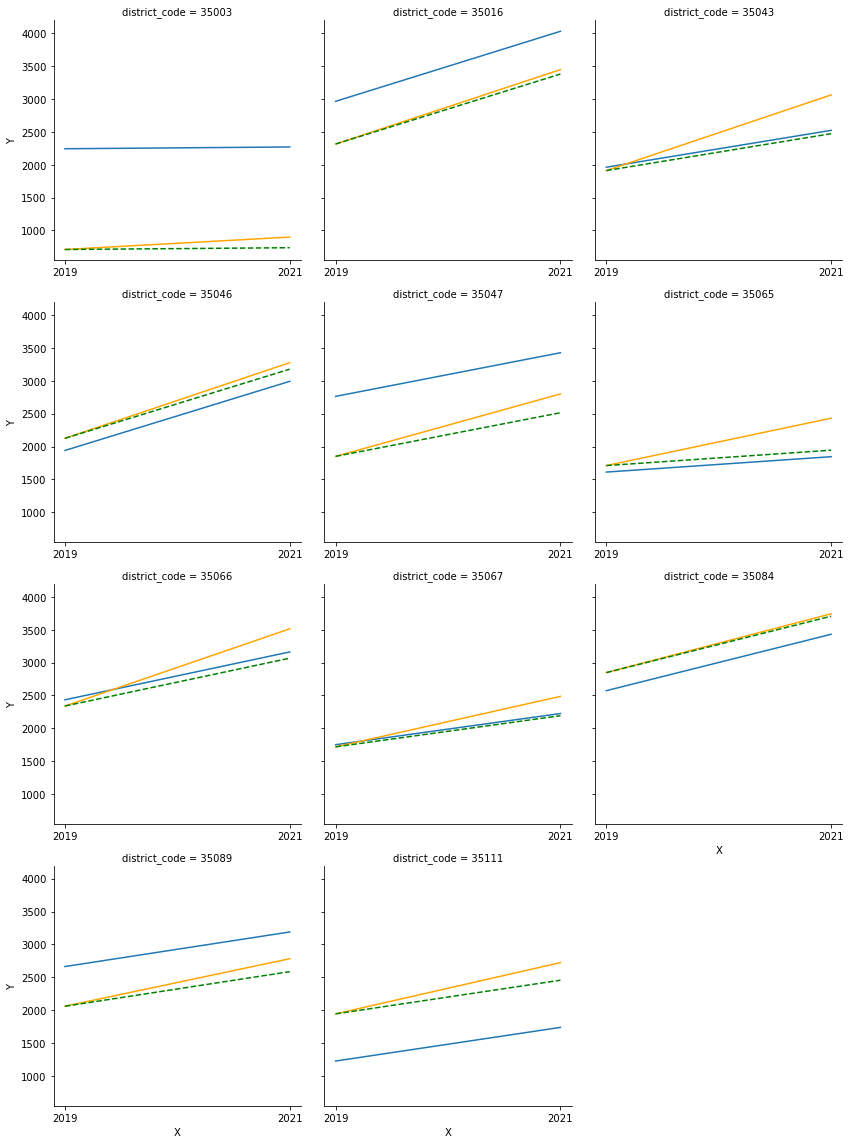

In [374]:
############# Main Section         #############
# Form a facetgrid using columns with a hue
graph = sns.FacetGrid(ddf, col ="district_code",  col_wrap=3,height=4, aspect= 1)
# map the above form facetgrid with some attributes

graph.map(sns.lineplot, "Years", "c_votes")
graph.map(sns.lineplot, "Years", "t_votes",color='orange')
graph.map(sns.lineplot, "Years", "DD_impact",color='g',ls="--")
axes = graph.axes.flatten()
axes[0].set_xlabel("X")
axes[0].set_ylabel("Y")
graph.set(xticks=[2019,2021])
graph.set_axis_labels("X","Y")

# show the object
for axis in graph.axes.flatten():
    axis.tick_params(labelbottom=True)



plt.show()